# Customer Data Segmentation 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
df=pd.read_csv("Mall_Customers.csv.")


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.drop(columns=['CustomerID','Gender'],inplace=True)

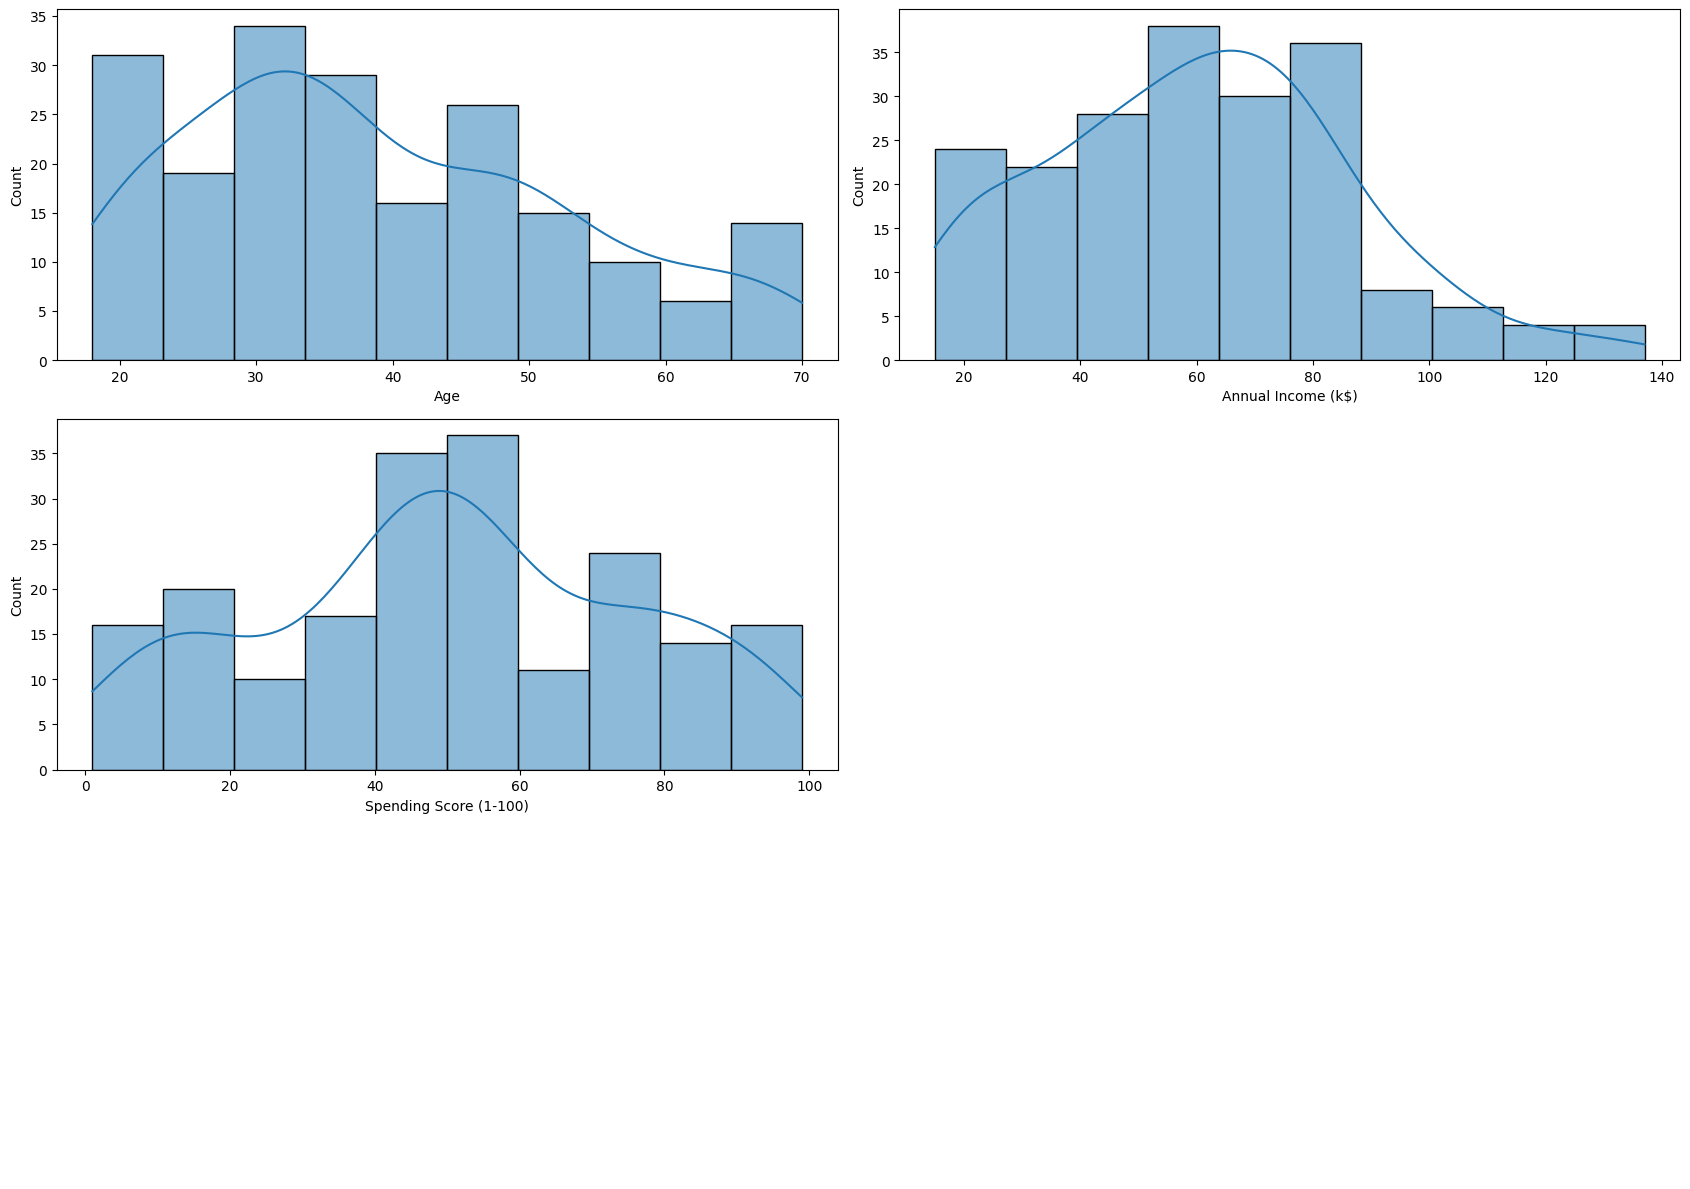

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 2, figsize=(17, 12))  # Adjust the figsize as needed
ax = ax.flatten()

features = df.columns
for i, column in enumerate(features):
    sns.histplot(data=df, x=column, kde=True, ax=ax[i],bins=10)

ax[3].axis('off')
ax[4].axis('off')
ax[5].axis('off')
plt.tight_layout()# This helps in avoiding overlap of subplots
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [13]:
features=df.columns
df[features] = scale.fit_transform(df[features])
df

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [14]:
from sklearn.decomposition import PCA
features=df.columns
pca = PCA(n_components=2)
new_data = pca.fit_transform(df)
new_data

array([[-6.15720019e-01, -1.76348088e+00],
       [-1.66579271e+00, -1.82074695e+00],
       [ 3.37861909e-01, -1.67479894e+00],
       [-1.45657325e+00, -1.77242992e+00],
       [-3.84652078e-02, -1.66274012e+00],
       [-1.48168526e+00, -1.73500173e+00],
       [ 1.09461665e+00, -1.56610230e+00],
       [-1.92630736e+00, -1.72111049e+00],
       [ 2.64517786e+00, -1.46084721e+00],
       [-9.70130513e-01, -1.63558108e+00],
       [ 2.49568861e+00, -1.47048914e+00],
       [-1.45688256e+00, -1.66436050e+00],
       [ 2.01018729e+00, -1.45329897e+00],
       [-1.41321072e+00, -1.61776746e+00],
       [ 1.00042965e+00, -1.49579176e+00],
       [-1.56943170e+00, -1.62502669e+00],
       [ 2.94060318e-01, -1.49425585e+00],
       [-1.31624924e+00, -1.57216383e+00],
       [ 1.31669910e+00, -1.37243404e+00],
       [-1.43679899e+00, -1.51039469e+00],
       [ 2.88561175e-01, -1.37988135e+00],
       [-1.26018513e+00, -1.45723906e+00],
       [ 1.66684303e+00, -1.27396755e+00],
       [-9.

In [15]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit_predict(new_data)
    wcss.append(km.inertia_)

In [16]:
explained_variance_ratios = pca.explained_variance_ratio_
explained_variance_ratios 

array([0.44266167, 0.33308378])

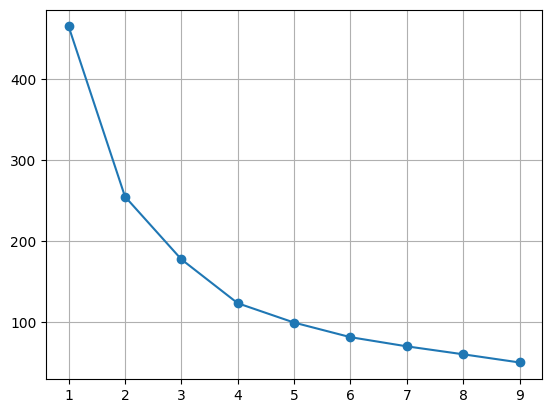

In [17]:

no_of_clust=[i for i in range(1,10)]

plt.plot(no_of_clust,wcss,marker='o')

plt.grid(True)

plt.show()

In [18]:
#pip install yellowbrick

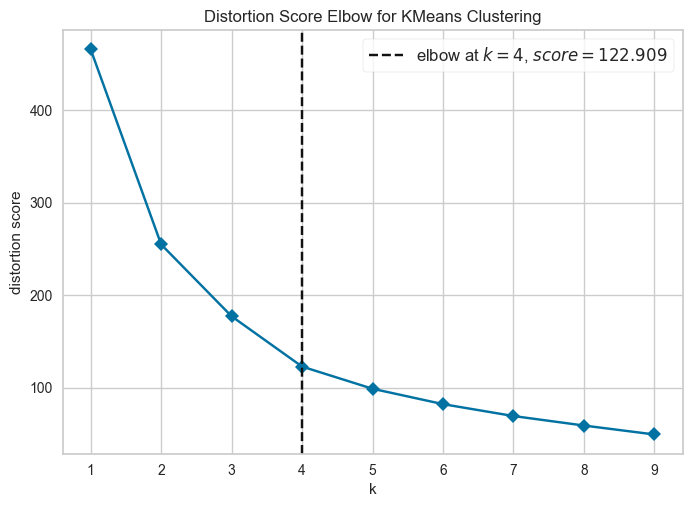

In [19]:
from yellowbrick.cluster import KElbowVisualizer
kmmodel = KMeans()
visualizer = KElbowVisualizer(kmmodel, k=(1, 10), timings=False) # Instantiate the KElbowVisualizer with the KMeans model
visualizer.fit(new_data) # You need to provide your data he
visualizer.show()
plt.show()

In [20]:
kmmodel= KMeans(n_clusters=4)
y_means = kmmodel.fit_predict(new_data)

In [21]:
y_means

array([2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0,
       0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

The expression new_data[y_means == 0, 0] is used to extract specific data points from the new_data array based on a condition. In this case, y_means == 0 is a boolean array where each element is True if the corresponding data point belongs to cluster 0, and False otherwise. The expression new_data[y_means == 0, 0] takes these boolean values and uses them to index the new_data array.

Let me break down the expression step by step:

y_means == 0: This creates a boolean array of the same length as y_means, where each element is True if the corresponding cluster assignment in y_means is 0, and False otherwise.

new_data[y_means == 0]: This indexing operation is performed on the new_data array. When you use a boolean array as an index, it selects only the elements of new_data for which the corresponding value in the boolean array is True. This results in a subset of new_data containing only the data points that belong to cluster 0.

new_data[y_means == 0, 0]: Finally, this additional indexing operation is used to select only the first column (dimension) of the subset of data points that belong to cluster 0. This is often used when working with multi-dimensional arrays, like in this case where new_data has two principal components (dimensions) after performing PCA.

In summary, the expression new_data[y_means == 0, 0] is extracting the values of the first dimension (principal component 1) from the new_data array for the data points that belong to cluster 0.







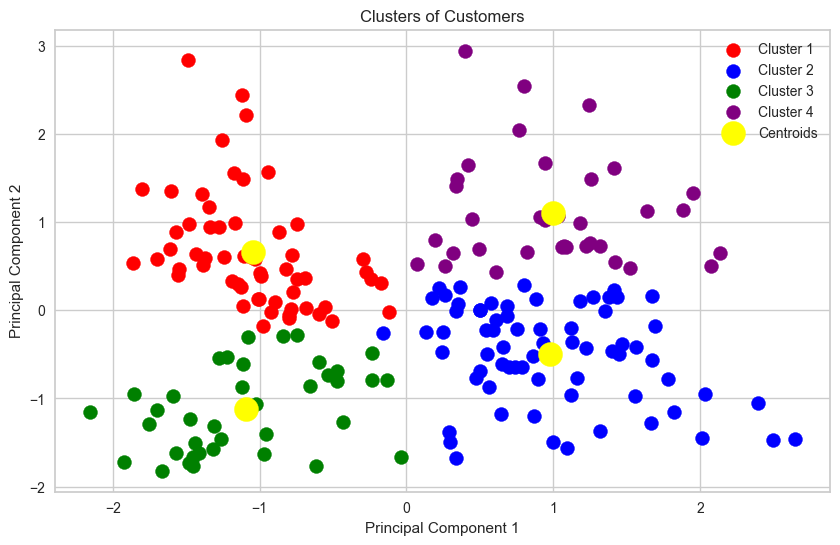

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(new_data[y_means == 0, 0], new_data[y_means == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(new_data[y_means == 1, 0], new_data[y_means == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(new_data[y_means == 2, 0], new_data[y_means == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(new_data[y_means == 3, 0], new_data[y_means == 3, 1], s=100, c='purple', label='Cluster 4')

# Plot the centroids of each cluster
plt.scatter(kmmodel.cluster_centers_[:, 0], kmmodel.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
